In [1]:
# import libraries
import numpy as np
np.set_printoptions(precision = 4, suppress = True)
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import gaussian_kde
import json

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
def experiment_dirs(set_dir):
    experiment_dirs = []
    
    for filename in os.listdir(set_dir):
        path = os.path.join(set_dir, filename)

        if os.path.isdir(path):
            experiment_dirs.append(path)
    
    return experiment_dirs   

In [3]:
def read_json(path):
    file = open(path, "r")
    doc = json.loads(file.read())
    file.close()
    return doc

In [4]:
out_dir = "./data/out"
optim_name = "genetic algorithm"
optim_dir = os.path.join(out_dir, optim_name)
set_name = "white-box-10"
set_dir = os.path.join(optim_dir, set_name)

In [5]:
data = {}

for experiment_dir in experiment_dirs(set_dir):
    progress = pd.read_csv(os.path.join(experiment_dir, "progress.csv"))
    
    settings_doc = read_json(os.path.join(experiment_dir, "settings.json"))
    asset_name = settings_doc["candles"]["currency pair"]["base"]
    
    data[asset_name] = progress

In [6]:
mean_fitness_col_name = "mean fitness"
best_fitness_col_name = "best fitness"
population_size_col_name = "population size"

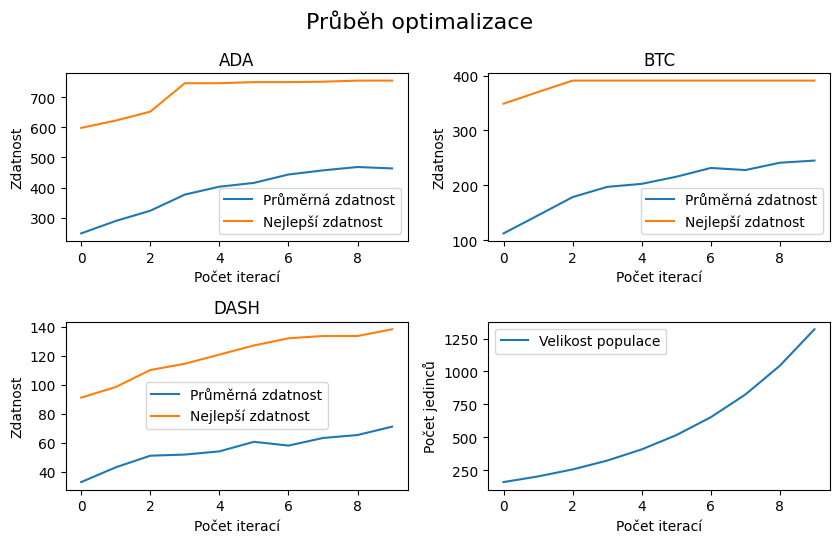

In [7]:
mean_fitness_label = "Průměrná zdatnost"
best_fitness_label = "Nejlepší zdatnost"
x_label = "Počet iterací"

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_size_inches(8.5, 5.5)
fig.suptitle("Průběh optimalizace", fontsize=16)

for (ax, asset_name) in zip((ax1, ax2, ax3), data):
    progress = data[asset_name]
    ax.plot(progress[mean_fitness_col_name], label=mean_fitness_label)
    ax.plot(progress[best_fitness_col_name], label=best_fitness_label)
    ax.set_xlabel(x_label)
    ax.set_ylabel("Zdatnost")
    ax.set_title(asset_name)
    ax.legend();
    
progress = data[asset_name]
ax4.plot(progress[population_size_col_name], label="Velikost populace")
ax4.set_xlabel(x_label)
ax4.set_ylabel("Počet jedinců")
ax4.legend();

fig.tight_layout()

In [8]:
report_dir = "./data/report"
optimizer_dir = os.path.join(report_dir, optim_name)

if not os.path.exists(optimizer_dir):
    os.makedirs(optimizer_dir)
    
progress_path = os.path.join(optimizer_dir, set_name+"-progress.png")
fig.savefig(progress_path, bbox_inches='tight', dpi=200)